<a href="https://colab.research.google.com/github/asra020601/heart_disease/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's start by importing all the important libraries.

train test






simple imputer
 encoding
 scaling

In [1]:
import pandas as pd #importing pandas to handle the dataframe.
import numpy as np #importing numpy incase we need to perform mathematical operations.
import matplotlib.pyplot as plt#importing matplotlib for visualization.
import seaborn as sns#importing seaborn  explore and understand the data.
import warnings
warnings.filterwarnings("ignore")

Now, let us read the csv file using pandas read_csv function.

In [55]:
df = pd.read_csv('/content/heartdisease2.csv')#data is stored in a variable called 'df'.

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'Unnamed: 14'],
      dtype='object')

# **BASIC EXPLORATION**

This shows number of rows and columns in the dataset.

In [56]:
df.shape #.shape attribute of pandas is used to determine the shape of the dataset.

(303, 15)

If we want to build a model from an extensive dataset, we have to randomly choose a smaller sample of the data that is done through a function sample.

In [57]:
df.sample() #pandas sample function is used to select the rows and columns from the DataFrame randomly.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
180,55,Male,0,132.0,353,0,1,132,1,1.2,1,NaN,3,0.0,Male


First five rows and all the columns are displayed to take a look at the data we are dealing with.

In [58]:
df.head() #pandas head function is used to display first rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
0,63,Male,3,145.0,233,1,0,150,0,2.3,0,0.0,1,1.0,Male
1,37,Male,2,130.0,250,0,1,187,0,3.5,0,0.0,2,1.0,Male
2,41,Female,1,130.0,204,0,0,172,0,1.4,2,0.0,2,1.0,Female
3,56,Male,1,120.0,236,0,1,178,0,0.8,2,0.0,2,1.0,Male
4,57,Female,0,120.0,354,0,1,163,1,0.6,2,0.0,2,1.0,Female


Last rows are displayed to confirm that the given information in above table is consistent throughout the dataset.




In [59]:
df.tail() #pandas tail function is used to display last rows of the dataset.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14
298,57,Female,0,140.0,241,0,1,123,1,0.2,1,0.0,3,0.0,Female
299,45,Male,3,110.0,264,0,1,132,0,1.2,1,0.0,3,0.0,Male
300,68,Male,0,144.0,193,1,1,141,0,3.4,1,2.0,3,0.0,Male
301,57,Male,0,130.0,131,0,1,115,1,1.2,1,1.0,3,0.0,Male
302,57,Female,1,130.0,236,0,0,174,0,0.0,1,1.0,2,0.0,Female


Basic information about the count of values and data type is presented using the below code.

In [60]:
df.info() #pandas info function is used to unveil some information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    object 
 1   sex          303 non-null    object 
 2   cp           303 non-null    object 
 3   trestbps     302 non-null    float64
 4   chol         303 non-null    int64  
 5   fbs          303 non-null    int64  
 6   restecg      303 non-null    int64  
 7   thalach      303 non-null    int64  
 8   exang        303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    int64  
 11  ca           140 non-null    float64
 12  thal         303 non-null    int64  
 13  target       301 non-null    float64
 14  Unnamed: 14  303 non-null    object 
dtypes: float64(4), int64(7), object(4)
memory usage: 35.6+ KB


The DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.

In [61]:
df.describe() #pandas describe function is used to describe the data.

,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,140.000000,303.000000,301.000000
mean,131.556291,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.914286,2.313531,0.548173
std,17.527818,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.121957,0.612277,0.498503
min,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,2.000000,3.000000,1.000000
max,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Next I checked the data types of all the variables. 

In [62]:
df.dtypes #pandas dtypes attribute is used to show the data type of variables.

age             object
sex             object
cp              object
trestbps       float64
chol             int64
fbs              int64
restecg          int64
thalach          int64
exang            int64
oldpeak        float64
slope            int64
ca             float64
thal             int64
target         float64
Unnamed: 14     object
dtype: object

Checking the number of unique values for every column to see if the categorical columns have the right count of unique values.

In [63]:
df.nunique() #checking the unique values

age             43
sex              2
cp               5
trestbps        49
chol           152
fbs              2
restecg          3
thalach         91
exang            2
oldpeak         40
slope            3
ca               5
thal             4
target           2
Unnamed: 14      2
dtype: int64

# **UNIQUE VALUES**

After checking every categorical column with inappropriate number of unique values. I have concluded that 'cp' column contains one extra value.

In [64]:
df['cp'].unique() #checking the unique values

array(['3', '2', '1', '0', 'a'], dtype=object)

I have decided to drop the unique value i.e 'a' in the given column as it makes no sense and I don't believe it fits in the column at all.

In [65]:
df.drop(df[df['cp'] == 'a'].index, inplace = True) #deleting the value using pandas drop function.

The age column is supposed to be numeric but is presented as 'object' data type. I investigated this problem by searching for unique values in the given column.

In [66]:
df['age'].unique() #checking the unique values

array(['63', '37', '41', '56', '57', '44', '52', '54', '48', '64', '58',
       '50', '66', '43', '69', '59', '42', '61', '40', '71', '51', '0',
       '53', '65', '46', '45', '39', '47', '62', '34', '35', '29', '55',
       '60', '67', '68', '74', '49', '76', '70', '38', '77', '40+'],
      dtype=object)

As seen above, the text '40+' is considered as a string and not an integer. But we do not know the real age of this person. But we can assume that this person is above forty years of age and replace '40+'  with mean age of the dataset.

Since there is no one aged -1 in the dataset we can safely change this to mean age back after we convert age column to int data type.

In [67]:
df['age'] = df['age'].replace(['40+'], -1) #replacing the string with a number using replace function

Changing both age and cp columns to integer data type. 

In [68]:
df[['age','cp']]=df[['age','cp']].astype(int) #changing data types of columns using astype function

Calculating mean and median age of the dataset.

In [69]:
print(df['age'].median()) #using median function finding the median age
print(df['age'].mean()) #using median function finding the median age

55.0
53.811258278145694


Imputing the '-1' value in the age column with the mean age.

In [70]:
df['age'] = df['age'].replace([-1], 53) ##replacing a number with another number using replace function.

Finally, checking the count of every value in the column.

In [71]:
df['age'].value_counts() #counting the number of values in the column.

58    18
57    17
54    16
59    14
52    13
51    12
56    11
44    11
60    11
62    11
41    10
64    10
63     9
53     9
67     9
45     8
43     8
55     8
42     8
61     8
66     7
65     7
46     7
50     7
48     7
47     5
39     4
70     4
35     4
68     4
71     3
38     3
40     3
49     3
69     3
0      2
34     2
37     2
74     1
29     1
76     1
77     1
Name: age, dtype: int64

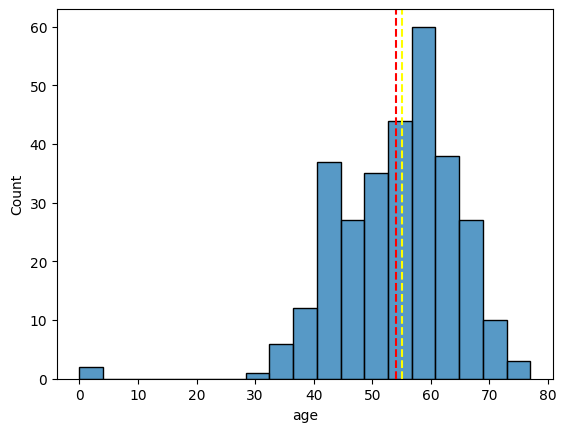

In [72]:
sns.histplot(df['age'])#examining the frequency of age in the data using histplot in sns library
plt.axvline(x=df['age'].mean(),
            color='red', linestyle= '--') #drawing a vertical line to highlight mean age using axvline in matplotlib
plt.axvline(x=df['age'].median(),
            color='yellow', linestyle = '--') #drawing a vertical line highlight median age using axvline in matplotlib

# **MISSING VALUES**

In [73]:
df.dtypes

age              int64
sex             object
cp               int64
trestbps       float64
chol             int64
fbs              int64
restecg          int64
thalach          int64
exang            int64
oldpeak        float64
slope            int64
ca             float64
thal             int64
target         float64
Unnamed: 14     object
dtype: object

Finding the number of null values in every column.

In [74]:
df.isnull().sum() #checking for null values

age              0
sex              0
cp               0
trestbps         1
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca             162
thal             0
target           2
Unnamed: 14      0
dtype: int64

Visualizing the amount of null values in every column to understand the pattern in the missing values.

<Axes: >

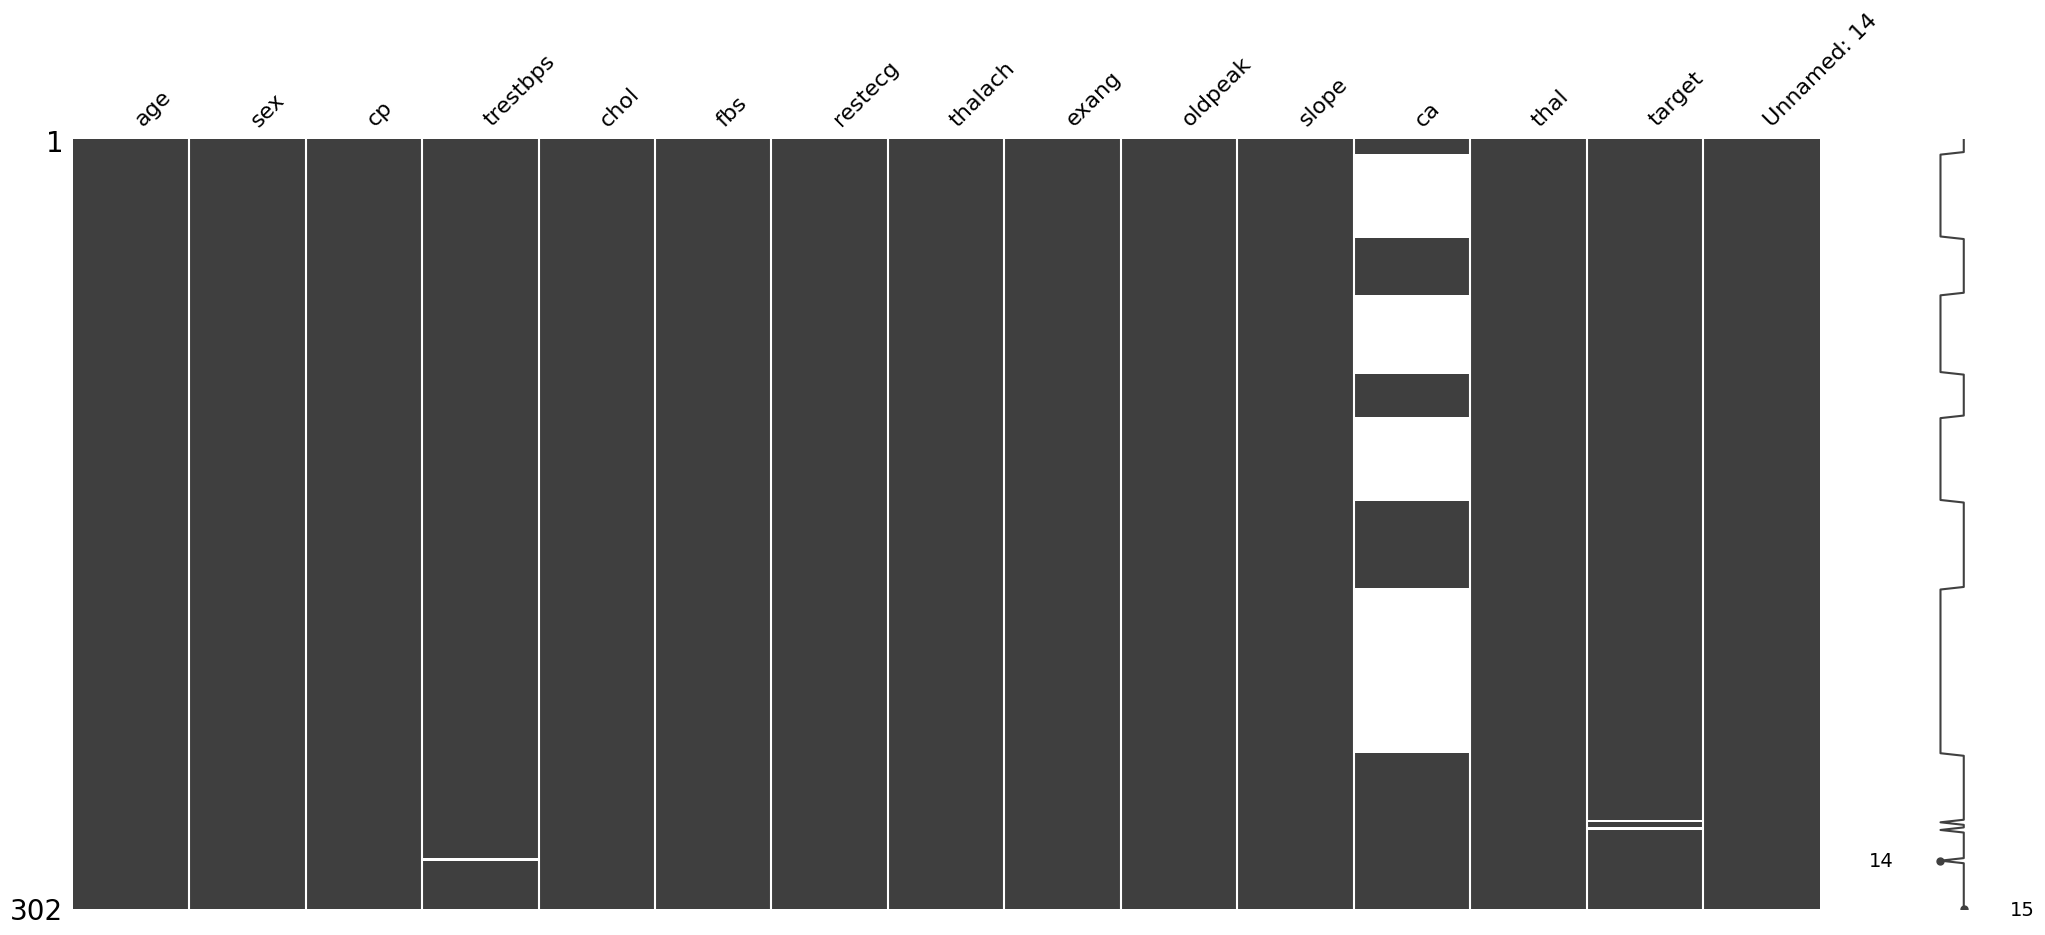

In [75]:
import missingno as msno #importing missingno
msno.matrix(df) #using the matrix function 

Since the 'ca' column has 50% of null values and 'ca' cannot be calculated using the present dataset. I have decided to drop the column.

In [76]:
df.drop(['ca'],axis = 1,inplace = True) #deleting the useless column

Checking for any difference between the'sex' column and the unnamed column.

In [77]:
pd.crosstab(df['Unnamed: 14'],df['sex']) #cross checking the values in both columns using crosstab

sex,Female,Male
Unnamed: 14,,
Female,96,0
Male,0,206


Since there is no difference I have dropped the column as it just a duplicate.

In [78]:
df.drop(['Unnamed: 14'],axis = 1,inplace = True) #dropping the duplicate column

In [80]:
df

,Age,Sex,Chest_pain,Rest_BP,Cholestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_HeartRate,Exercise_Angina,ST_depression_oldpeak,Slope_oldpeak,thalium_stress_result,target
0,63,Male,3,145.0,233,1,0,150,0,2.3,0,1,1.0
1,37,Male,2,130.0,250,0,1,187,0,3.5,0,2,1.0
2,41,Female,1,130.0,204,0,0,172,0,1.4,2,2,1.0
3,56,Male,1,120.0,236,0,1,178,0,0.8,2,2,1.0
4,57,Female,0,120.0,354,0,1,163,1,0.6,2,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140.0,241,0,1,123,1,0.2,1,3,0.0
299,45,Male,3,110.0,264,0,1,132,0,1.2,1,3,0.0
300,68,Male,0,144.0,193,1,1,141,0,3.4,1,3,0.0
301,57,Male,0,130.0,131,0,1,115,1,1.2,1,3,0.0


Renaming the columns to more self explanatory titles.

In [79]:
df.rename(columns = {'chol':'Cholestrol',
                     'fbs':'Fasting_Blood_Sugar', 
                     'cp' : 'Chest_pain',
                     'restecg':'Rest_ECG', 
                     'trestbps' : 'Rest_BP',
                     'thalach' : 'MAX_HeartRate',
                     'exang' : 'Exercise_Angina',
                     'oldpeak' : 'ST_depression_oldpeak',
                     'slope' : 'Slope_oldpeak',
                     'thal' : 'thalium_stress_result',
                     'age' : 'Age',
                     'sex' : 'Sex'}, inplace = True)

# **OUTLIERS**

The boxplot displayed above exhibits an outlier, however, due to its rarity, it has been removed from the analysis.

<Axes: >

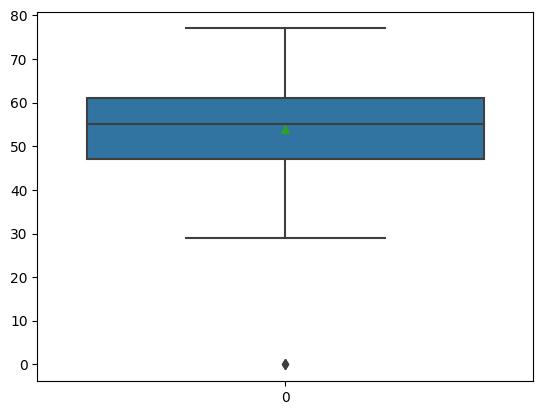

In [81]:
sns.boxplot(df['Age'],showmeans=True)

In [82]:
age_m = round(df["Age"].mean())
df["Age"]=df["Age"].apply(lambda x: age_m if x == 0 else x)


After applying imputation by replacing the outlier with the mean age, a subsequent examination of the boxplot reveals the absence of any outliers. This outcome proves advantageous for the purpose of conducting exploratory data analysis.

<Axes: >

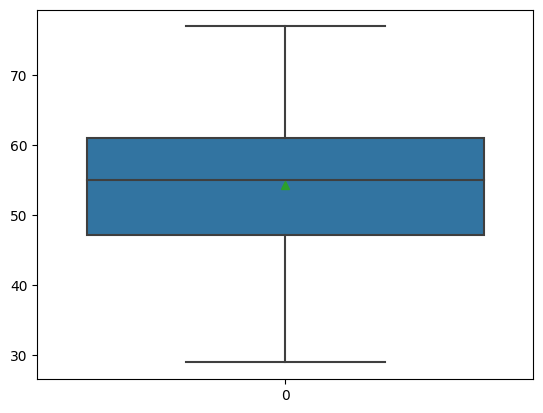

In [83]:
sns.boxplot(df['Age'],showmeans=True)

Subsequently, we proceed to inspect another numerical variable for the presence of outliers, employing the utilization of a boxplot to identify such anomalies.

<Axes: >

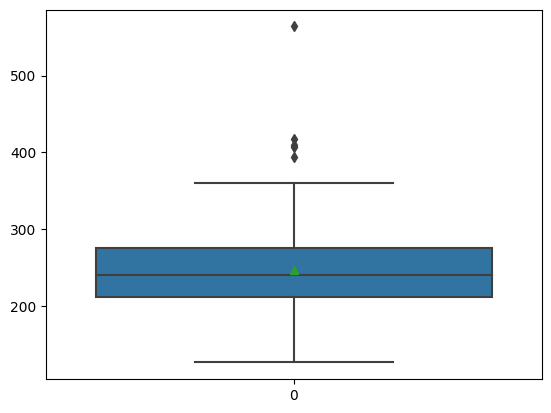

In [84]:
sns.boxplot(df['Cholestrol'],showmeans=True)

To ascertain the leaning direction of this column, both upper and lower outliers are depicted below. Notably, there are several values observed in the upper outlier region. 


In [ ]:
data = df['Cholestrol']
mean = np.mean(data) #using numpy mean
std = np.std(data) #using numpy std
outlier_upper = [i for i in data if i > mean+3*std]
outlier_lower = [i for i in data if i < mean-3*std]


In [ ]:
outlier_upper

[417, 564, 407, 409]

In [ ]:
outlier_lower

[]


The acceptable values, which may still be considered extreme and contribute to the analysis, remain unaffected even after outlier detection. However, any abnormal and implausible values have been appropriately removed from the dataset to ensure data integrity.

Text(0.5, 1.0, 'Boxplot of  chol')

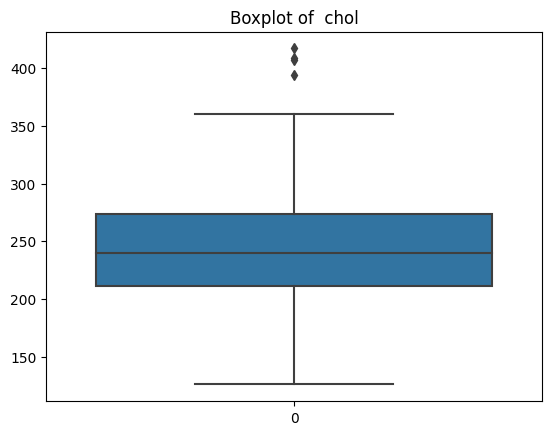

In [ ]:
chol_m = round(df["Cholestrol"].mean())
df["Cholestrol"]=df["Cholestrol"].apply(lambda x: chol_m if x > 500 else x)
sns.boxplot(df['Cholestrol'])
plt.title("Boxplot of  chol")

Precisely one outlier has been identified in the boxplot of the maximum heart rate variable.

<Axes: >

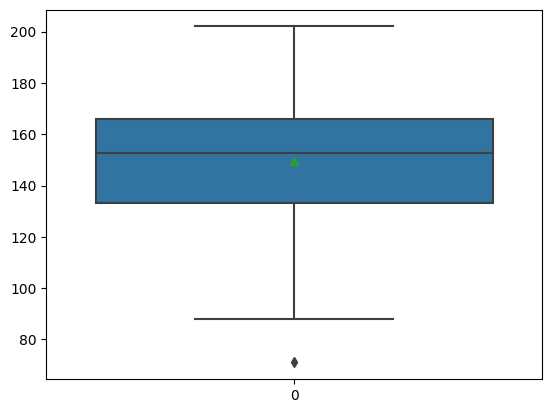

In [ ]:
sns.boxplot(df['MAX_HeartRate'],showmeans=True)

To gather further information about the outlier detected in the dataframe, we can locate and examine the specific data point.

In [ ]:
df[df['MAX_HeartRate'] < 80]

,Age,Sex,Chest_pain,Rest_BP,Cholestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_HeartRate,Exercise_Angina,ST_depression_oldpeak,Slope_oldpeak,thalium_stress_result,target
272,67,Male,0,120.0,237,0,1,71,0,1.0,1,2,0.0


Ultimately, the decision has been made to replace the identified outlier with the mean value in order to maintain data consistency and mitigate any potential distortion caused by the outlier.

In [ ]:
thalach_m = round(df["MAX_HeartRate"].mean())
df["MAX_HeartRate"]=df["MAX_HeartRate"].apply(lambda x: thalach_m if x < 80 else x)

<Axes: >

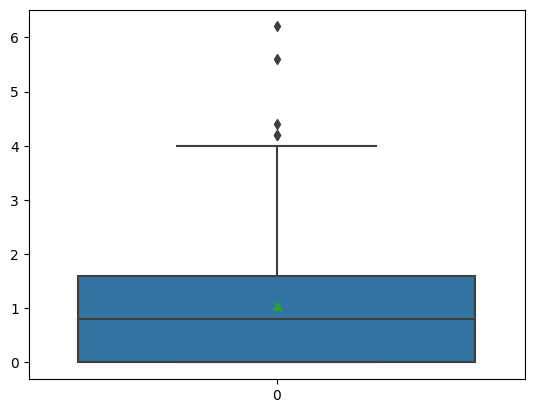

In [ ]:
sns.boxplot(df['ST_depression_oldpeak'],showmeans=True)

<Axes: >

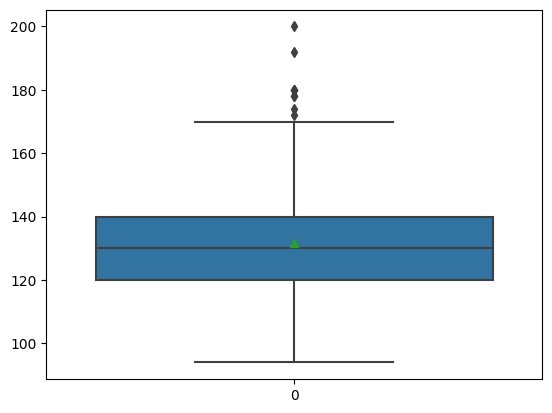

In [ ]:
sns.boxplot(df['Rest_BP'],showmeans=True)

 I have decided to not delete the other possible outliers because they represent interesting phenomena that are worth exploring further, removing them can distort the distribution and skew the results. Removing outliers can introduce bias into the analysis and compromise the validity of the results.

# **VISUALIZATION**

Calcuting the average age of individuals with or without heart disease in the disease.

In [ ]:
# Get the average age of all patients
avg_age = df['Age'].mean()
print("Average age of all patients:", avg_age)

# Get the average age of patients with heart disease
avg_age_hd = df.loc[df['target'] == 1, 'Age'].mean()
print("Average age of patients with heart disease:", avg_age_hd)

# Get the average age of patients without heart disease
avg_age_no_hd = df.loc[df['target'] == 0, 'Age'].mean()
print("Average age of patients without heart disease:", avg_age_no_hd)

Average age of all patients: 54.347682119205295
Average age of patients with heart disease: 52.451219512195124
Average age of patients without heart disease: 56.588235294117645


The histogram demonstrates that the mean age of individuals with heart disease is lower than the mean age of those without heart disease. It is worth noting that the overall average age of individuals in this dataset is 54.

Text(0.5, 1.0, 'Frequency of ages and Average of ages with and without heart disease.')

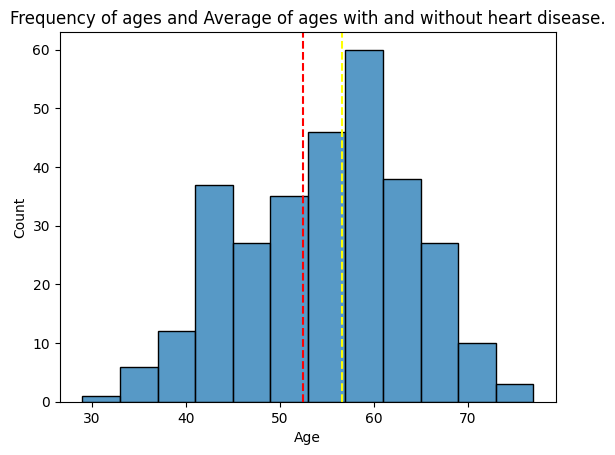

In [ ]:
sns.histplot(df['Age'])
plt.axvline(x=avg_age_hd,
            color='red', linestyle= '--')
plt.axvline(x=avg_age_no_hd,
            color='yellow', linestyle = '--')
plt.title('Frequency of ages and Average of ages with and without heart disease.')

The presented line chart depicts a discernible positive correlation between the presence of heart disease and the maximum achieved heart rate, wherein patients with a confirmed diagnosis of heart disease exhibit higher levels of maximum heart rate in comparison to those without such a condition. Notably, a substantial deviation in maximum heart rate between the two groups is observed before the age of 60, whereas a more subtle, albeit significant, distinction can be discerned after that age threshold.

Text(0.5, 1.0, 'Relationship between Age and MAX_HeartRate')

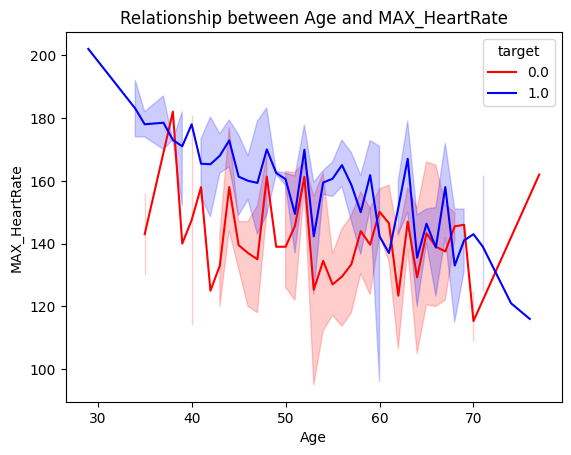

In [ ]:
sns.lineplot(y=df['MAX_HeartRate'],x=df['Age'],hue = df['target'],palette=['red','blue'])
plt.title('Relationship between Age and MAX_HeartRate')

This line chart demonstrates a clear differentiation in the maximum heart rate and cholesterol levels between patients with different types of chest pain. Patients with typical angina (0) , a chest pain related to decreased blood supply to the heart, exhibit lower max heart rates and cholesterol levels when compared to patients with atypical angina (1) or asymptomatic chest pain not showing signs of disease (3). However, non-anginal pain, typically associated with esophageal spasms (2), can be observed in patients across all cholesterol levels and maximum heart rates.

Text(0.5, 1.0, 'Relationship between maximum heart rate and cholesterol levels based on Chest pain intensity')

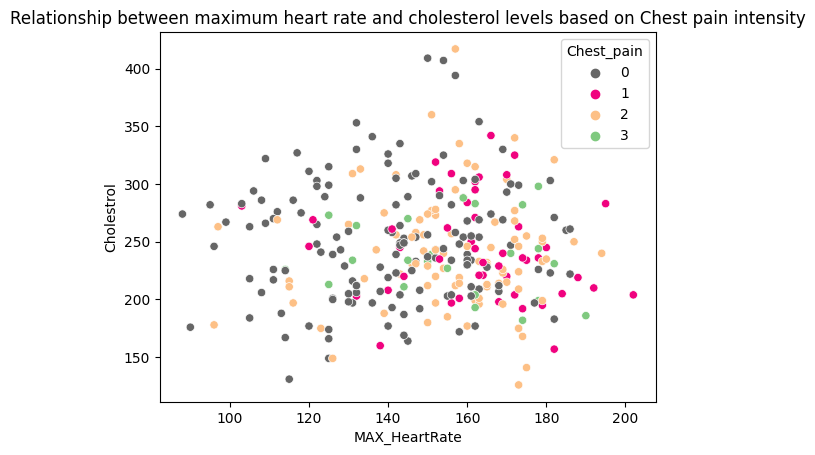

In [ ]:
sns.scatterplot(x=df['MAX_HeartRate'],y=df['Cholestrol'],hue = df['Chest_pain'], palette = 'Accent_r')
plt.title('Relationship between maximum heart rate and cholesterol levels based on Chest pain intensity')

The correlation between age and cholestrol concerning rest ecg reveals that a possible or definite left ventricular hypertrophy(2), which indicates enlargement of the heart's primary pumping chamber, is a rare occurrence and is primarily observed in individuals above the age of 50. ST-T Wave abnormality(1), which ranges from mild symptoms to severe issues, indicates an irregular heartbeat and is dispersed throughout the plot. In fifty percent of the cases, there is nothing noteworthy to report(0).

Text(0.5, 1.0, 'Correlation  between age and cholestrol with respect to rest ecg')

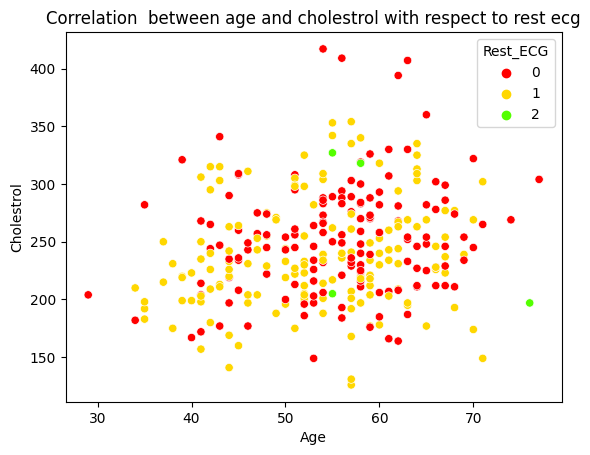

In [ ]:
sns.scatterplot(x=df['Age'],y=df['Cholestrol'],hue = df['Rest_ECG'],palette ='prism')
plt.title('Correlation  between age and cholestrol with respect to rest ecg')

The presented data demonstrates that individuals with a low maximum heart rate and cholesterol level exhibit a flatsloping trend (1), indicative of minimal change and typical of a healthy heart. Conversely, those with a high heart rate and elevated cholesterol levels exhibit a downsloping trend(2), implying signs of an unhealthy heart. Moreover, individuals with a better heart rate response to exercise, a rare occurrence, display an upsloping trend(0), observed in both high and low cholesterol levels.

Text(0.5, 1.0, 'Comparison of MAX_HeartRate and Cholestrol with respect to Slope_oldpeak')

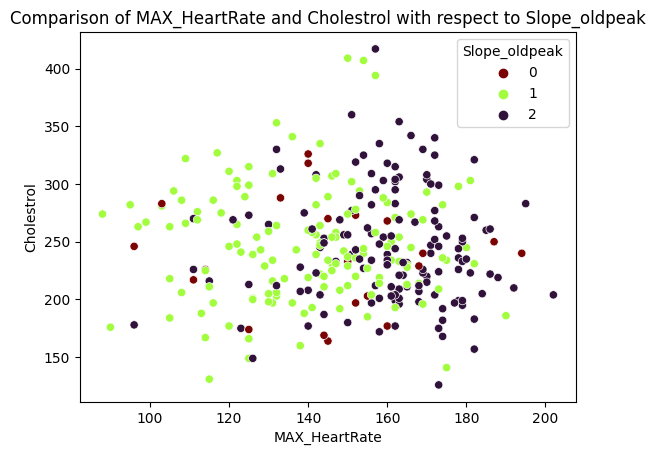

In [ ]:
sns.scatterplot(x=df['MAX_HeartRate'],y=df['Cholestrol'],hue = df['Slope_oldpeak'],palette = 'turbo_r')
plt.title('Comparison of MAX_HeartRate and Cholestrol with respect to Slope_oldpeak')

There appears to be a positive correlation between age and cholesterol levels, however, individuals with and without heart disease exhibit similar cholesterol levels across age groups, with a noticeable peak in the 60s.

Text(0.5, 1.0, 'Relationship between age, cholestrol according to heart disease')

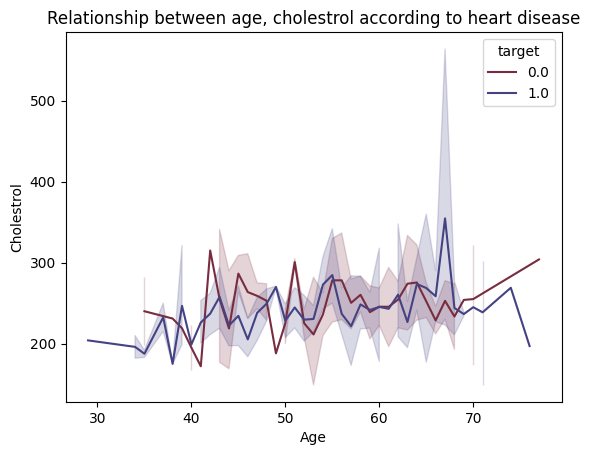

In [87]:
sns.lineplot(x='Age', y='Cholestrol',hue = 'target',data=df,palette = 'icefire_r')
plt.title('Relationship between age, cholestrol according to heart disease')

The scatterplot reveals that individuals with exercise-induced angina tend to exhibit higher levels of both heart rate and cholesterol, albeit with some outliers. Conversely, those without exercise-induced angina appear to be dispersed more evenly across the scatterplot.

Text(0.5, 1.0, 'Analysis of MAX_HeartRate and cholestrol with respect to Exercise Angina')

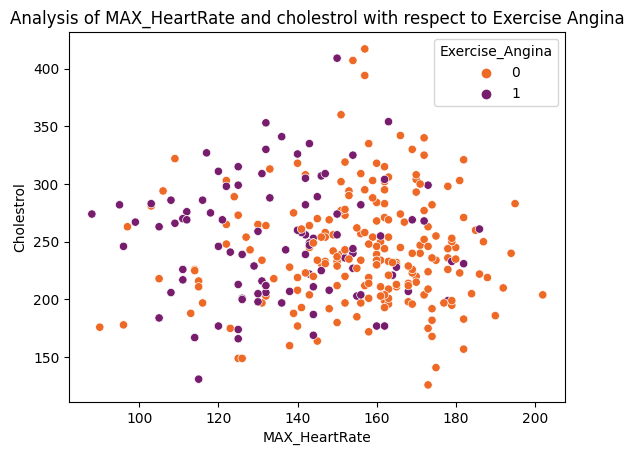

In [ ]:
sns.scatterplot(x=df['MAX_HeartRate'],y=df['Cholestrol'],hue = df['Exercise_Angina'],palette = 'inferno_r')
plt.title('Analysis of MAX_HeartRate and cholestrol with respect to Exercise Angina')

This histogram shows the distribution of ST depression oldpeak values for patients with and without heart disease. We can see if there is any overlap in the distributions or if they are clearly separated, which provides insight into the relationship between ST depression oldpeak values and heart disease.

The analysis of st_depression_oldpeak values in the heart disease dataset reveals that individuals with heart disease exhibit a frequency distribution that is right skewed with a peak at 0. Similarly, individuals without heart disease also demonstrate a right skewed frequency distribution of st_depression_oldpeak values. However, a significant difference exists in their values at 0 when compared to individuals with heart disease.

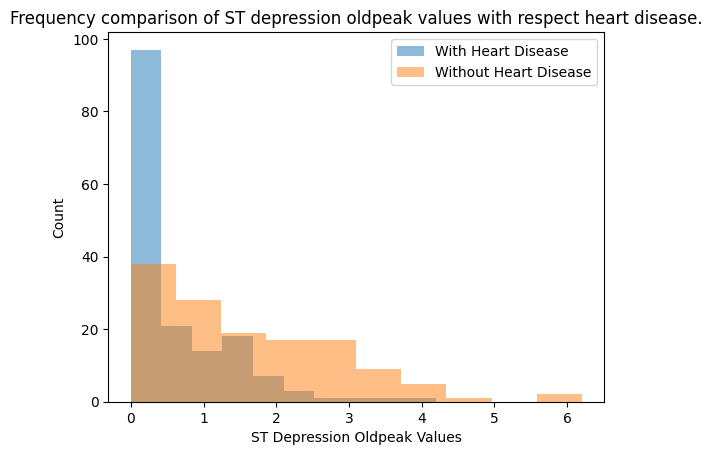

In [ ]:
# Filter the dataset to separate patients with and without heart disease
with_hd = df[df['target'] == 1]['ST_depression_oldpeak']
without_hd = df[df['target'] == 0]['ST_depression_oldpeak']

# Plot the distribution of ST depression oldpeak values for patients with and without heart disease
plt.hist(with_hd, alpha=0.5, label='With Heart Disease')
plt.hist(without_hd, alpha=0.5, label='Without Heart Disease')
plt.xlabel('ST Depression Oldpeak Values')
plt.ylabel('Count')
plt.legend()
plt.title('Frequency comparison of ST depression oldpeak values with respect heart disease.')
plt.show()

# **DATA PREPROCESSING**

Before passing the dataframe to the column transformer pipeline, it is essential to perform a thorough check for any null or missing values within the dataset.

In [86]:
df.isnull().sum()

Age                      0
Sex                      0
Chest_pain               0
Rest_BP                  1
Cholestrol               0
Fasting_Blood_Sugar      0
Rest_ECG                 0
MAX_HeartRate            0
Exercise_Angina          0
ST_depression_oldpeak    0
Slope_oldpeak            0
thalium_stress_result    0
target                   0
dtype: int64

In order to avoid any complications during machine learning model training, it is advisable not to impute or fill in the null values in the target column. Instead, the recommended approach is to remove or delete the two instances with null values in the target column from the dataset.

In [85]:
df.dropna(subset = ['target'], inplace=True)

# **PIPELINE**

Importing the requisite libraries from scikit-learn for data imputation, feature encoding, feature scaling, model training, model testing, model creation, and cross-validation. These libraries will be utilized within the column transformer framework of the pipeline.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

Performing data testing and training refers to the process of splitting the dataset into two subsets: one for training the model and the other for evaluating its performance. This allows us to assess how well the model generalizes to unseen data.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=42)

A pipeline has been established to facilitate the seamless execution of data preprocessing and machine learning tasks. The pipeline encompasses four key steps, including data imputation, feature encoding, feature scaling, and applying a machine learning model. This systematic approach ensures that the necessary transformations and modeling operations are carried out in a streamlined manner.

In [ ]:
#1st Imputation Transformer
trf1 = ColumnTransformer([
        ('impute_age',SimpleImputer(),[3]),
        ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
    ],remainder='passthrough')

#2nd One Hot Encoding
trf2 = ColumnTransformer([('ohe_sex_embarked', OneHotEncoder(sparse=False, handle_unknown='ignore'),[2]),('ord_encode',OrdinalEncoder(),[3,6,10])],remainder = 'passthrough')

#3rd Scaling
trf3 = ColumnTransformer([
    ('scale', MinMaxScaler(), slice(0,13))
])


#4th Model
trf4 = LogisticRegression()

The aforementioned pipeline has been successfully deployed, and the four sequential steps are being executed accordingly. A visual representation of this pipeline is presented in the diagram below.

In [ ]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4)
])

# Display Pipeline
from sklearn import set_config
set_config(display='diagram')
#fit data
pipe.fit(X_train, y_train)


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [3]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [2]),
                                                 ('ord_encode',
                                                  OrdinalEncoder(),
                                                  [3, 6, 10])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 13, None))])),
                ('trf4', LogisticRegression())])

Subsequently, the deployed pipeline is subjected to rigorous testing, wherein it is prompted to predict the dependent variable based on the provided inputs and underlying model configurations.

In [ ]:
results = pipe.predict(X_test)

To facilitate a visual comparison between the predictions generated by the pipeline and the actual (real) target values, a table is constructed, showcasing five sets of predictions alongside their corresponding original target values. This table allows for an easy assessment of the accuracy and performance of the pipeline's predictions.

In [ ]:
predictions = pd.DataFrame({'original test set':y_test, 'predictions': results})
predictions.sample(5)

,original test set,predictions
204,0.0,1.0
267,0.0,1.0
153,1.0,1.0
9,1.0,1.0
234,0.0,1.0


The accuracy score of the pipeline is computed to quantify the overall accuracy and performance of the predictions. It provides a measure of the proportion of correct predictions made by the pipeline compared to the total number of predictions.

In [ ]:
pipe.score(X_train,y_train)

0.5583333333333333

# **DECISION TREE**

A second pipeline has been developed, sharing similarities with the first one in terms of data imputation, feature scaling, and encoding. However, it diverges in the machine learning model utilized, employing decision trees instead of logistic regression for predictive analysis. This alternative pipeline aims to explore the potential benefits and variations in performance that can arise from employing a different modeling technique.

In [ ]:
#1st Imputation Transformer
trf21 = ColumnTransformer([
        ('impute_age',SimpleImputer(),[3]),
        ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
    ],remainder='passthrough')

#2nd One Hot Encoding
trf22 = ColumnTransformer([('ohe_sex_embarked', OneHotEncoder(sparse=False, handle_unknown='ignore'),[2]),('ord_encode',OrdinalEncoder(),[3,6,10])],remainder = 'passthrough')

#3rd Scaling
trf23 = ColumnTransformer([
    ('scale', MinMaxScaler(), slice(0,13))
])


#4th Model
trf24 = DecisionTreeClassifier()

In [ ]:
pipe2 = Pipeline([
    ('trf21', trf21),
    ('trf22', trf22),
    ('trf23', trf23),
    ('trf24', trf24)
])

# Display Pipeline
from sklearn import set_config
set_config(display='diagram')
#fit data
pipe2.fit(X_train, y_train)


Pipeline(steps=[('trf21',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [3]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf22',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [7]),
                                                 ('ord_encode',
                                                  OrdinalEncoder(),
                                                  [3, 6, 10])])),
                ('trf23',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 13, None))])),
                ('trf24', DecisionTreeClassifier())])

In [ ]:
results2 = pipe2.predict(X_test)

In [ ]:
predictions2 = pd.DataFrame({'original test set':y_test, 'predictions': results2})
predictions2.head(5)

,original test set,predictions
204,0.0,1.0
267,0.0,1.0
153,1.0,1.0
9,1.0,1.0
234,0.0,0.0


The decision tree model has demonstrated superior accuracy in comparison to logistic regression. Through its hierarchical structure and ability to capture complex interactions among variables, the decision tree model has yielded more precise and accurate predictions. This outcome suggests that decision trees are well-suited for capturing non-linear relationships and inherent patterns within the data, leading to enhanced predictive performance.

In [ ]:
pipe2.score(X_train,y_train)

0.6083333333333333

# **RANDOM FOREST**

In our pursuit of achieving even more accurate predictions, we have expanded our exploration of machine learning models to include Random Forest. As a result, an additional pipeline has been developed, incorporating the Random Forest model as its core algorithm. By harnessing the power of ensemble learning and leveraging a multitude of decision trees, the Random Forest model offers the potential to further enhance prediction accuracy and robustness. This new pipeline will enable us to compare the performance of Random Forest with the previously used models and assess its effectiveness in generating more accurate predictions.

In [ ]:
#1st Imputation Transformer
trf31 = ColumnTransformer([
        ('impute_age',SimpleImputer(),[3]),
        ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
    ],remainder='passthrough')

#2nd One Hot Encoding
trf32 = ColumnTransformer([('ohe_sex_embarked', OneHotEncoder(sparse=False, handle_unknown='ignore'),[2]),('ord_encode',OrdinalEncoder(),[3,6,10])],remainder = 'passthrough')

#3rd Scaling
trf33 = ColumnTransformer([
    ('scale', MinMaxScaler(), slice(0,13))
])


#4th Model
trf34 = RandomForestClassifier()

In [ ]:
pipe3 = Pipeline([
    ('trf31', trf31),
    ('trf32', trf32),
    ('trf33', trf33),
    ('trf34', trf34)
])

# Display Pipeline
from sklearn import set_config
set_config(display='diagram')
#fit data
pipe3.fit(X_train, y_train)

Pipeline(steps=[('trf31',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [3]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf32',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [2]),
                                                 ('ord_encode',
                                                  OrdinalEncoder(),
                                                  [3, 6, 10])])),
                ('trf33',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 13, None))])),
                ('trf34', RandomForestClassifier())])

In [ ]:
pipe3.score(X_train,y_train)

0.5708333333333333

After a thorough examination of the accuracy scores obtained from all the models and pipelines, a decision has been made to select the decision tree model as the optimal choice for this particular dataset. The decision tree's ability to capture complex relationships and deliver accurate predictions aligns well with the requirements and characteristics of the dataset at hand. This decision ensures that the model choice is tailored to maximize accuracy and reliability in the prediction process.